### Imports

In [1]:
import itertools
import pandas as pd

import numpy as np
from PIL import Image
from glob import glob
from tqdm import tqdm

### Constants

In [2]:
FLAG_PATHS = glob("flag_images/*.gif")

### Utilities

In [3]:
def round_rgb(value, base=16):
    return min(round(value/base)*base, 255)

### Load Data

In [4]:
images = [Image.open(path).convert("RGB") for path in FLAG_PATHS]

### Image Size/Aspect

aspect
2.000000    41
1.498127    39
1.497006    33
1.500000    12
1.992032     9
            ..
1.382271     1
1.779359     1
1.646091     1
2.007092     1
1.544402     1
Name: count, Length: 84, dtype: int64


<Axes: >

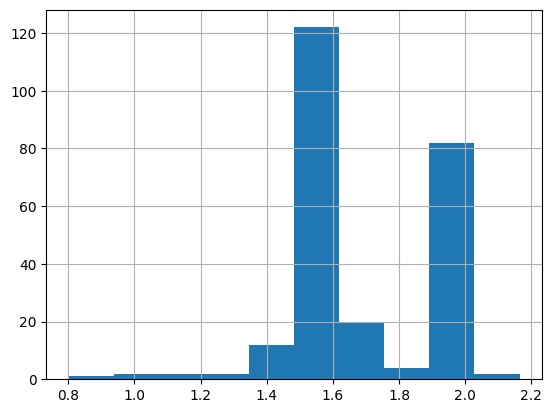

In [5]:
img_sizes = pd.DataFrame([img.size for img in images], columns=["width", "height"])
img_sizes["aspect"] = img_sizes.apply(lambda row: row.width/row.height, axis=1)
print(img_sizes.aspect.value_counts())
img_sizes.aspect.hist()

### Colour Analysis

In [6]:
rgb_values = []
for img in images:
    values = list(img.getdata())
    rounded_rgb = [(round_rgb(r), round_rgb(g), round_rgb(b)) for r, g, b in values]
    rgb_values.extend(rounded_rgb)
rgb_values = pd.Series(rgb_values)
rgb_values.value_counts()

(255, 255, 255)    7006968
(240, 32, 32)      5486840
(0, 160, 80)       2518769
(0, 96, 176)       2456491
(255, 240, 0)      1683590
                    ...   
(64, 48, 112)            1
(48, 16, 64)             1
(96, 0, 32)              1
(208, 176, 0)            1
(48, 96, 80)             1
Name: count, Length: 2289, dtype: int64

In [8]:
all_colours = [list(range(0, 256, 16)), list(range(0, 256, 16)), list(range(0, 256, 16))]
all_colours = set(itertools.product(*all_colours))
len(all_colours)

4096

In [9]:
unused_colours = all_colours - set(rgb_values.values)
len(unused_colours)

2032

In [10]:
nodes = np.array([*rgb_values.values])
furthest = 0
furthest_point = (0, 0, 0)
for rgb in tqdm(unused_colours):
    node = np.array(rgb)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    closest = np.min(dist_2)
    if closest > furthest:
        furthest = closest
        furthest_point = node

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2032/2032 [38:06<00:00,  1.13s/it]


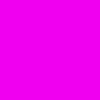

In [11]:
Image.new("RGB", (100, 100), color=tuple(furthest_point))